In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import numpy as np

In [97]:
df = pd.read_csv('Orders.csv')

In [98]:
df.head()

,ID,User ID,Product ID,Subtotal,Tax,Total,Discount ($),Created At,Quantity
0,1508,216,28,R$ 68.12,R$ 2.72,R$ 70.84,NaN,19/04/2020,2
1,14124,1874,126,R$ 125.24,R$ 6.26,R$ 131.50,NaN,19/04/2020,2
2,11805,1561,176,R$ 57.92,R$ 2.49,R$ 60.41,NaN,19/04/2020,2
3,10753,1417,141,R$ 126.20,R$ -,R$ 126.20,NaN,19/04/2020,4
4,4148,576,130,R$ 75.03,R$ -,R$ 75.03,NaN,19/04/2020,2


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18760 entries, 0 to 18759
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            18760 non-null  int64 
 1   User ID       18760 non-null  int64 
 2   Product ID    18760 non-null  int64 
 3   Subtotal      18760 non-null  object
 4   Tax           18760 non-null  object
 5   Total         18760 non-null  object
 6   Discount ($)  1915 non-null   object
 7   Created At    18760 non-null  object
 8   Quantity      18760 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


In [116]:
df['Created At'].head(20)

0     19/04/2020
1     19/04/2020
2     19/04/2020
3     19/04/2020
4     19/04/2020
5     19/04/2020
6     19/04/2020
7     19/04/2020
8     19/04/2020
9     18/04/2020
10    18/04/2020
11    18/04/2020
12    18/04/2020
13    18/04/2020
14    18/04/2020
15    18/04/2020
16    18/04/2020
17    18/04/2020
18    18/04/2020
19    18/04/2020
Name: Created At, dtype: object

In [ ]:
df['Discount ($)'] = df['Discount ($)'].str.replace('R$', '')
df['Total'] = df['Total'].str.replace('R$', '').str.replace(' ', '')


df['Discount ($)'] = df['Discount ($)'].astype(float)
df['Total'] = df['Total'].astype(float)

In [102]:
df['Subtotal'] = df['Subtotal'].str.replace('R$', '')

df['Subtotal'] = df['Subtotal'].astype(float)

In [130]:
df['Tax']= df['Tax'].str.replace('R$', '').str.replace('-', '')

df['Tax'] = pd.to_numeric(df['Tax'], errors='coerce')

# Preenchendo NaN com a mediana
df['Tax'] = df['Tax'].fillna(df['Tax'].median(), inplace=True)

C:\Users\Mauro Jorge Ernesto\AppData\Local\Temp\ipykernel_6308\4113896518.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tax'] = df['Tax'].fillna(df['Tax'].median(), inplace=True)  # Preenchendo NaN com a mediana


In [117]:
# Converter data para formato datetime
df['Created At'] = pd.to_datetime(df['Created At'], format="%d/%m/%Y")

In [103]:
df['Discount ($)'] = df['Discount ($)'].fillna(0.0)


In [137]:
#Criar uma coluna de ano
df['Ano'] = df['Created At'].dt.year


In [138]:
df['Faturamento'] = df['Total'] * df['Quantity']

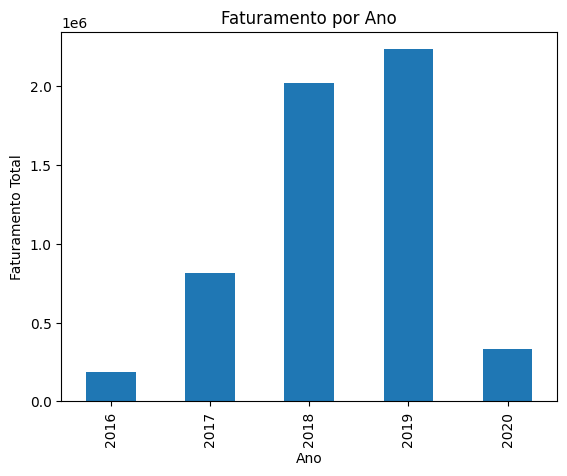

In [139]:
#verificar como o faturamento evolui ao longo do tempo.
df.groupby('Ano')['Faturamento'].sum().plot(kind='bar', title="Faturamento por Ano")
plt.ylabel("Faturamento Total")
plt.show()

In [140]:
#criar um novo DataFrame apenas com a soma do faturamento anual
df_anual = df.groupby('Ano')['Faturamento'].sum().reset_index()


In [141]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Criar variáveis independentes (X) e dependentes (y)
X = df_anual['Ano'].values.reshape(-1, 1)
y = df_anual['Faturamento'].values

# Criar o modelo e treinar
model = LinearRegression()
model.fit(X, y)

# Fazer previsão para o próximo ano
proximo_ano= np.array([[df_anual['Ano'].max() + 1]])
receita_prevista = model.predict(proximo_ano)

print(f"Previsão de faturamento para {proximo_ano[0][0]}: {receita_prevista[0]:,.2f}")


Previsão de faturamento para 2021: 1,627,960.60


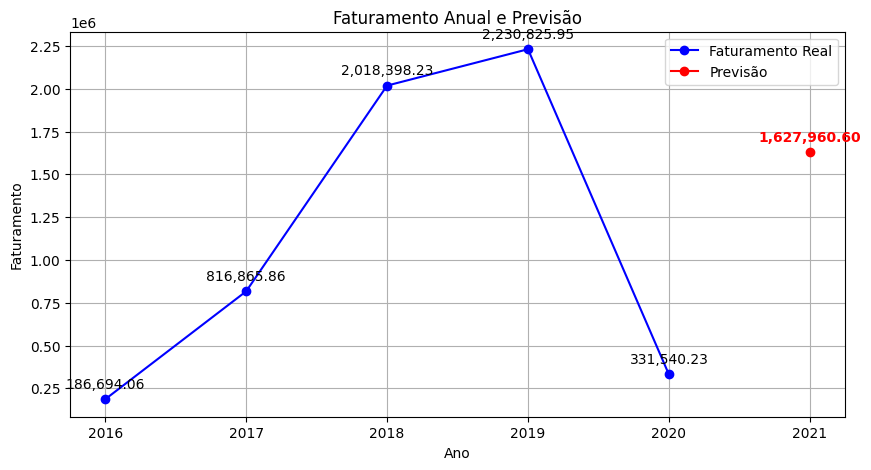

In [142]:
import matplotlib.pyplot as plt

# Fazer previsão para todos os anos (incluindo o próximo)
anos_futuros = np.append(X, proximo_ano)  # Inclui o próximo ano no array de anos
receita_prevista_todos = model.predict(anos_futuros.reshape(-1, 1))  # Previsão para todos os anos

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_anual['Ano'], df_anual['Faturamento'], marker='o', linestyle='-', label="Faturamento Real", color='blue')
plt.plot(proximo_ano, receita_prevista, marker='o', linestyle='-', label="Previsão", color='red')

# Adicionar rótulos nos pontos reais
for i, txt in enumerate(df_anual['Faturamento']):
    plt.annotate(f"{txt:,.2f}", (df_anual['Ano'][i], df_anual['Faturamento'][i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Adicionar rótulo na previsão
plt.annotate(f"{receita_prevista[0]:,.2f}", (proximo_ano[0][0], receita_prevista[0]), textcoords="offset points", xytext=(0, 8), ha='center', color='red', fontweight='bold')

# Configuração do gráfico
plt.xlabel("Ano")
plt.ylabel("Faturamento")
plt.title("Faturamento Anual e Previsão")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
